# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.6795764326493511
3.8927785557111423 -0.6825059918857165
3.8967793558711743 -0.6854246266714343
3.9007801560312063 -0.6883322902897256
3.9047809561912383 -0.6912289361994198
3.9087817563512703 -0.6941145180357001
3.9127825565113024 -0.6969889896108455
3.9167833566713344 -0.6998523049149701
3.9207841568313664 -0.7027044181167592
3.9247849569913984 -0.7055452835642037
3.9287857571514304 -0.70837485578533
3.9327865573114624 -0.7111930894889282
3.9367873574714944 -0.7139999395652773
3.9407881576315265 -0.7167953610868667
3.9447889577915585 -0.7195793093091156
3.9487897579515905 -0.7223517396710895
3.9527905581116225 -0.7251126077962124
3.9567913582716545 -0.727861869492979
3.9607921584316865 -0.73059948075566
3.9647929585917185 -0.7333253977650076
3.9687937587517506 -0.7360395768889568
3.9727945589117826 -0.7387419746833238
3.9767953590718146 -0.7414325478925008
3.9807961592318466 -0.7441112534501492
3.984796959391878 -0.746778048479888
3.98879775955191 -0.7494328902959818
3.992798559711

8.073614722944589 0.9759774544951031
8.07761552310462 0.975097985391633
8.081616323264653 0.9742029084987154
8.085617123424685 0.9732922381432919
8.089617923584717 0.9723659889018987
8.093618723744749 0.9714241756004337
8.09761952390478 0.9704668133139192
8.101620324064813 0.9694939173662599
8.105621124224845 0.968505503329999
8.109621924384877 0.9675015870260675
8.113622724544909 0.9664821845235319
8.11762352470494 0.9654473121393364
8.121624324864973 0.9643969864380426
8.125625125025005 0.9633312242315631
8.129625925185037 0.9622500425788936
8.133626725345069 0.9611534587858388
8.137627525505101 0.9600414904047365
8.141628325665133 0.9589141552341757
8.145629125825165 0.957771471318712
8.149629925985197 0.9566134569485794
8.153630726145229 0.9554401306593961
8.157631526305261 0.9542515112318698
8.161632326465293 0.9530476176914949
8.165633126625325 0.9518284693082499
8.169633926785357 0.9505940855962877
8.173634726945389 0.9493444863136237
8.177635527105421 0.9480796914618196
8.18163

11.990398079615924 -0.5446506770394283
11.994398879775956 -0.5412910039532575
11.998399679935988 -0.5379226667572781
12.00240048009602 -0.5345457193663773
12.006401280256052 -0.5311602158332602
12.010402080416084 -0.5277662103475849
12.014402880576116 -0.5243637572350945
12.018403680736148 -0.5209529109567488
12.02240448089618 -0.5175337261078512
12.026405281056212 -0.5141062574171756
12.030406081216244 -0.5106705597460903
12.034406881376276 -0.5072266880876798
12.038407681536308 -0.5037746975658645
12.04240848169634 -0.5003146434345183
12.046409281856372 -0.4968465810765844
12.050410082016404 -0.4933705660031889
12.054410882176436 -0.4898866538527519
12.058411682336468 -0.48639490039009703
12.0624124824965 -0.4828953615055592
12.066413282656532 -0.47938809321408954
12.070414082816564 -0.47587315165435917
12.074414882976596 -0.47235059308786026
12.078415683136628 -0.4688204738980059
12.08241648329666 -0.46528285058922725
12.086417283456692 -0.46173777978606934
12.090418083616724 -0.458

15.347069413882776 0.3531106476159113
15.351070214042808 0.3493647567024084
15.35507101420284 0.3456132737236519
15.359071814362872 0.34185625872730613
15.363072614522904 0.3380937718495829
15.367073414682936 0.33432587331427904
15.371074214842968 0.33055262343181246
15.375075015003 0.3267740825982568
15.379075815163032 0.3229903112943746
15.383076615323064 0.3192013700846494
15.387077415483096 0.3154073196163161
15.391078215643129 0.3116082206183904
15.39507901580316 0.3078041339006967
15.399079815963193 0.3039951203528948
15.403080616123225 0.300181240943505
15.407081416283257 0.2963625567189327
15.411082216443289 0.2925391288024908
15.41508301660332 0.2887110183934216
15.419083816763353 0.2848782867659173
15.423084616923385 0.2810409952681388
15.427085417083417 0.27719920532123427
15.431086217243449 0.2733529784183556
15.43508701740348 0.2695023761236744
15.439087817563513 0.2656474600713964
15.443088617723545 0.26178829196477504
15.447089417883577 0.2579249335751237
15.451090218043


19.419883976795358 0.5399082097317845
19.42388477695539 0.5432714488766285
19.427885577115422 0.5466259922119087
19.431886377275454 0.5499717860435281
19.435887177435486 0.5533087768174373
19.439887977595518 0.556636911120492
19.44388877775555 0.5599561356813078
19.447889577915582 0.5632663973711134
19.451890378075614 0.5665676432046003
19.455891178235646 0.5698598203407713
19.459891978395678 0.5731428760837864
19.46389277855571 0.5764167578838059
19.467893578715742 0.5796814133378315
19.471894378875774 0.582936790190546
19.475895179035806 0.5861828363351483
19.479895979195838 0.5894194998141886
19.48389677935587 0.5926467288203994
19.487897579515902 0.5958644716975251
19.491898379675934 0.5990726769411485
19.495899179835966 0.6022712931995157
19.499899979995998 0.6054602692743575
19.50390078015603 0.6086395541217091
19.507901580316062 0.6118090968527276
19.511902380476094 0.6149688467345055
19.515903180636126 0.6181187531908838
19.51990398079616 0.621258765803261
19.52390478095619 0.

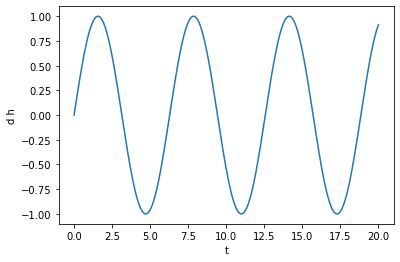

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

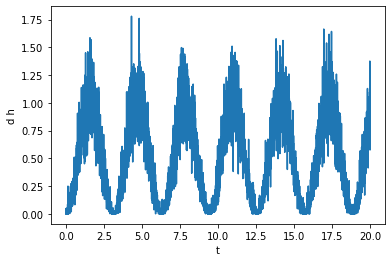

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

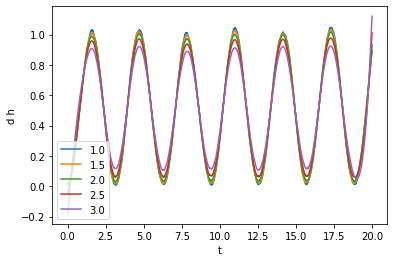

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

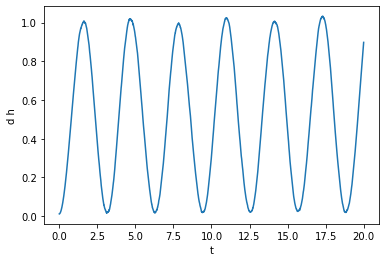

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1600


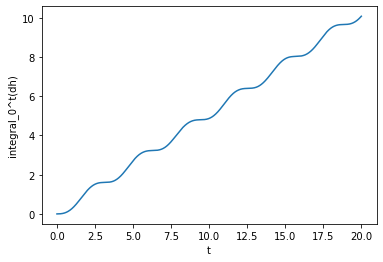

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

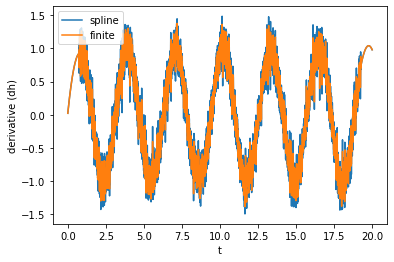

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

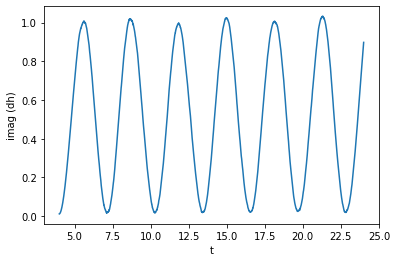

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

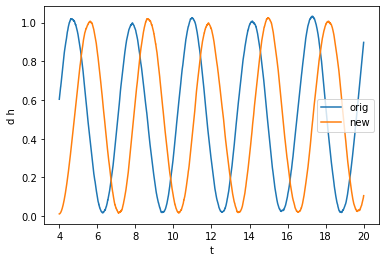

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

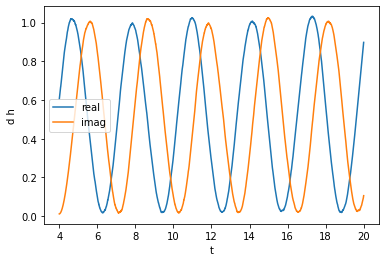

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

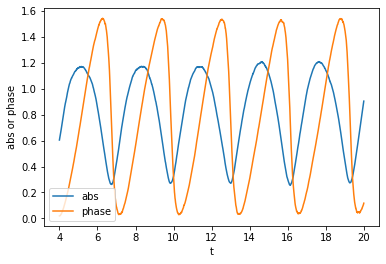

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

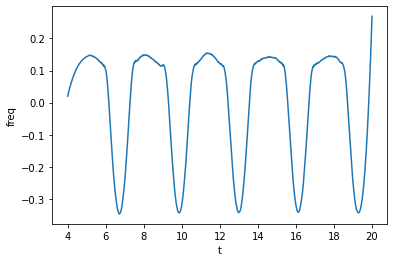

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

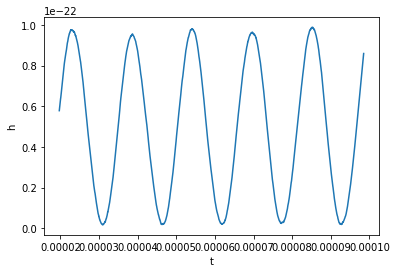

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

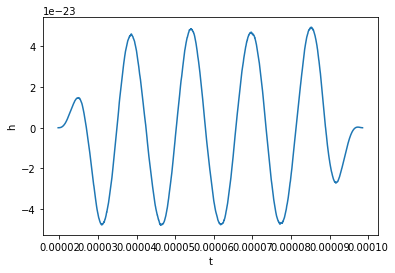

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

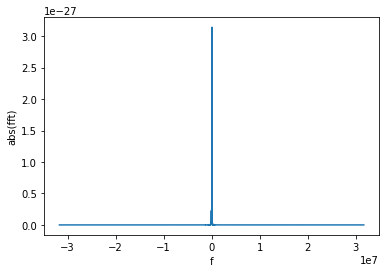

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

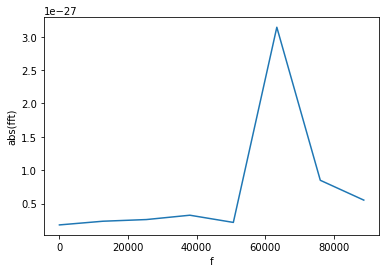

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64199.56


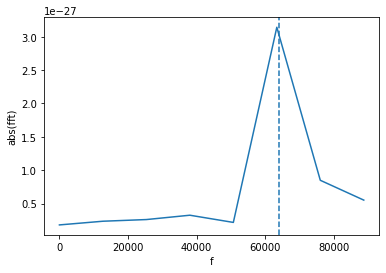

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.141e-27
Maximum with mask 8.488e-28
Length with mask 8
Length after having removed the masked points 7
